In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

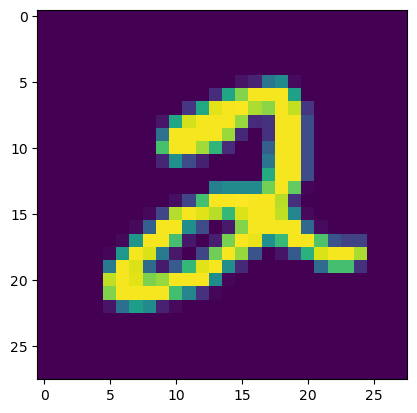

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

Scaling

In [7]:
x_train=x_train/255
x_test=x_test/255

Build a CNN model

In [10]:
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)), #32,26,26
    keras.layers.MaxPooling2D((2,2)), #32,13,13

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'), #32,64,11,11
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9020 - loss: 0.3245
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9860 - loss: 0.0464
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9900 - loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9932 - loss: 0.0206
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9952 - loss: 0.0147


In [13]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0381


[0.03012150526046753, 0.989799976348877]

Prediction

In [17]:
y_pred=model.predict(x_test)
y_pred[5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.50725874e-02, 9.99978721e-01, 1.14947446e-01, 2.78683692e-05,
       3.93224388e-01, 7.94247375e-04, 1.85155328e-02, 8.83393347e-01,
       2.60744274e-01, 2.97752805e-02], dtype=float32)

In [39]:
import numpy as np
np.argmax(y_pred[5])

1

In [40]:
y_test[5]

1

In [49]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    0,    0,    1,    1,    1,    1,    1],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1018,    2,    3,    0,    0,    5,    2,    0],
       [   0,    1,    0, 1003,    0,    4,    0,    0,    2,    0],
       [   0,    0,    1,    0,  978,    0,    0,    0,    3,    0],
       [   1,    0,    0,    6,    0,  884,    1,    0,    0,    0],
       [   3,    3,    0,    1,    4,    4,  941,    0,    2,    0],
       [   0,    3,    1,    1,    1,    1,    0, 1019,    0,    2],
       [   3,    0,    2,    2,    0,    1,    0,    2,  962,    2],
       [   0,    0,    0,    0,   15,    6,    0,    2,    2,  984]])>

Text(95.72222222222221, 0.5, 'Truth')

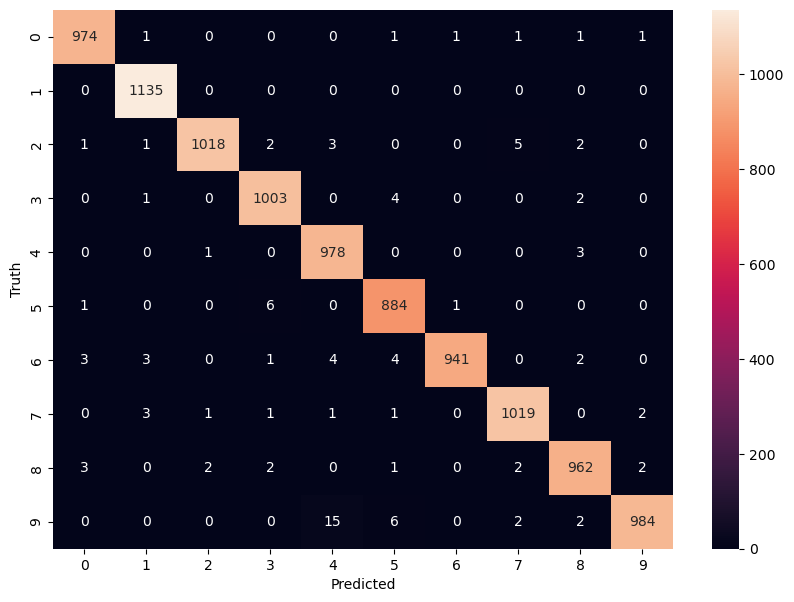

In [45]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

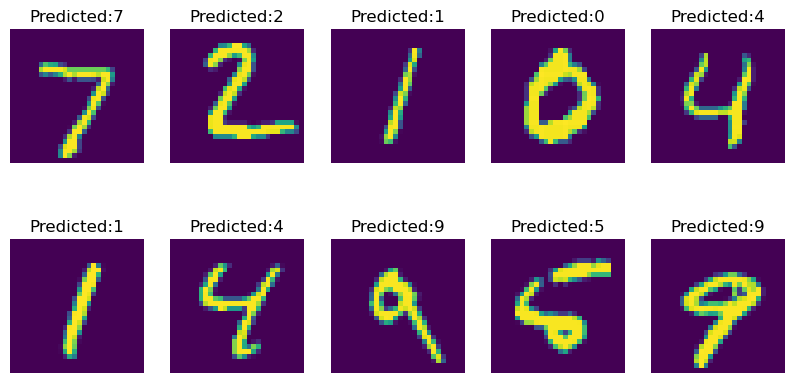

In [48]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f"Predicted:{y_predicted[i]}")
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
plt.show()